In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv(".\\Data\\20210914\\listings.csv")
df['date'] = pd.to_datetime('2021-09-14')
pd.to_datetime(df['date'], format='%Y-%m-%d').dt.floor('D')

0       2021-09-14
1       2021-09-14
2       2021-09-14
3       2021-09-14
4       2021-09-14
           ...    
10804   2021-09-14
10805   2021-09-14
10806   2021-09-14
10807   2021-09-14
10808   2021-09-14
Name: date, Length: 10809, dtype: datetime64[ns]

In [184]:
df1 = pd.read_csv(".\\Data\\20211211\\listings.csv")
df1['date'] = pd.to_datetime('2021-12-11')
pd.to_datetime(df['date'], format='%Y-%m-%d').dt.floor('D')

df = pd.concat([df,df1], axis=0)

In [185]:
df1 = pd.read_csv(".\\Data\\20220312\\listings.csv")
df1['date'] = pd.to_datetime('2022-03-12')
pd.to_datetime(df['date'], format='%Y-%m-%d').dt.floor('D')

df = pd.concat([df,df1], axis=0)

In [186]:
df1 = pd.read_csv(".\\Data\\20220608\\listings.csv")
df1['date'] = pd.to_datetime('2022-06-08')
pd.to_datetime(df['date'], format='%Y-%m-%d').dt.floor('D')

df = pd.concat([df,df1], axis=0)

In [187]:
df1 = pd.read_csv(".\\Data\\20220912\\listings.csv")
df1['date'] = pd.to_datetime('2022-09-12')
pd.to_datetime(df['date'], format='%Y-%m-%d').dt.floor('D')

df = pd.concat([df,df1], axis=0)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69563 entries, 0 to 18336
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              69563 non-null  int64         
 1   name                            69563 non-null  object        
 2   host_id                         69563 non-null  int64         
 3   host_name                       69276 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   69563 non-null  int64         
 6   latitude                        69563 non-null  float64       
 7   longitude                       69563 non-null  float64       
 8   room_type                       69563 non-null  object        
 9   price                           69563 non-null  int64         
 10  minimum_nights                  69563 non-null  int64         
 11  nu

In [189]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.956300e+04,6.956300e+04,0.0,69563.000000,69563.000000,69563.000000,69563.000000,69563.000000,69563.000000,54735.000000,69563.000000,69563.000000,69563.000000,0.0
mean,7.886066e+16,1.226011e+08,NaN,78710.689993,30.288560,-97.779744,317.033610,7.732703,34.517301,1.789975,19.822046,151.305637,10.444274,NaN
std,2.054693e+17,1.331648e+08,NaN,71.428246,0.117223,0.142136,739.488002,25.246523,71.541124,3.960776,57.618299,138.960303,18.525248,NaN
min,1.078000e+03,2.300000e+01,NaN,76530.000000,29.674790,-98.606320,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.039622e+07,1.569776e+07,NaN,78702.000000,30.241460,-97.781480,100.000000,1.000000,1.000000,0.290000,1.000000,0.000000,0.000000,NaN
50%,3.988795e+07,6.446383e+07,NaN,78705.000000,30.271010,-97.746230,170.000000,2.000000,7.000000,1.000000,2.000000,119.000000,2.000000,NaN
75%,5.144965e+07,1.954970e+08,NaN,78741.000000,30.323350,-97.718560,300.000000,3.000000,33.000000,2.360000,6.000000,305.000000,14.000000,NaN
max,7.140332e+17,4.790769e+08,NaN,78759.000000,31.042608,-97.177990,23000.000000,1100.000000,1062.000000,339.000000,398.000000,365.000000,460.000000,NaN


In [190]:
df.nunique()

id                                24041
name                              26364
host_id                           12566
host_name                          4563
neighbourhood_group                   0
neighbourhood                        80
latitude                          19171
longitude                         18496
room_type                             4
price                              1769
minimum_nights                       79
number_of_reviews                   658
last_review                        1735
reviews_per_month                  1347
calculated_host_listings_count       87
availability_365                    366
number_of_reviews_ltm               188
license                               0
date                                  5
dtype: int64

In [191]:
df['date'] = df['date'].astype(str)

In [192]:
df = df[df['neighbourhood'] >= 78701] 

In [193]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

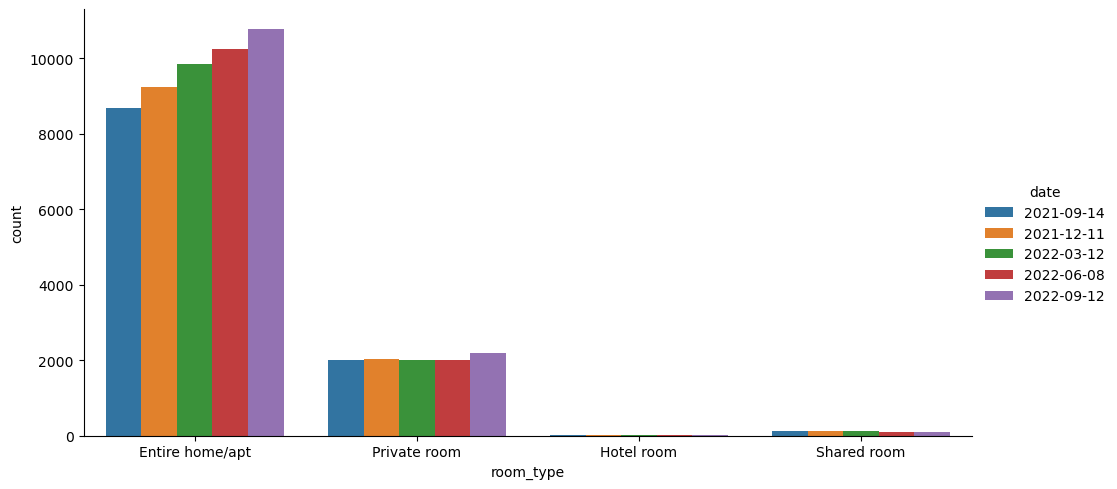

In [194]:
sns.catplot(x='room_type', kind='count', data=df, hue='date', aspect=2)
plt.show()

We can see that the most popular type of rental is 'Entire home/apt', and that the total number of units offered has grown at a steady pace over the past 5 quarters.

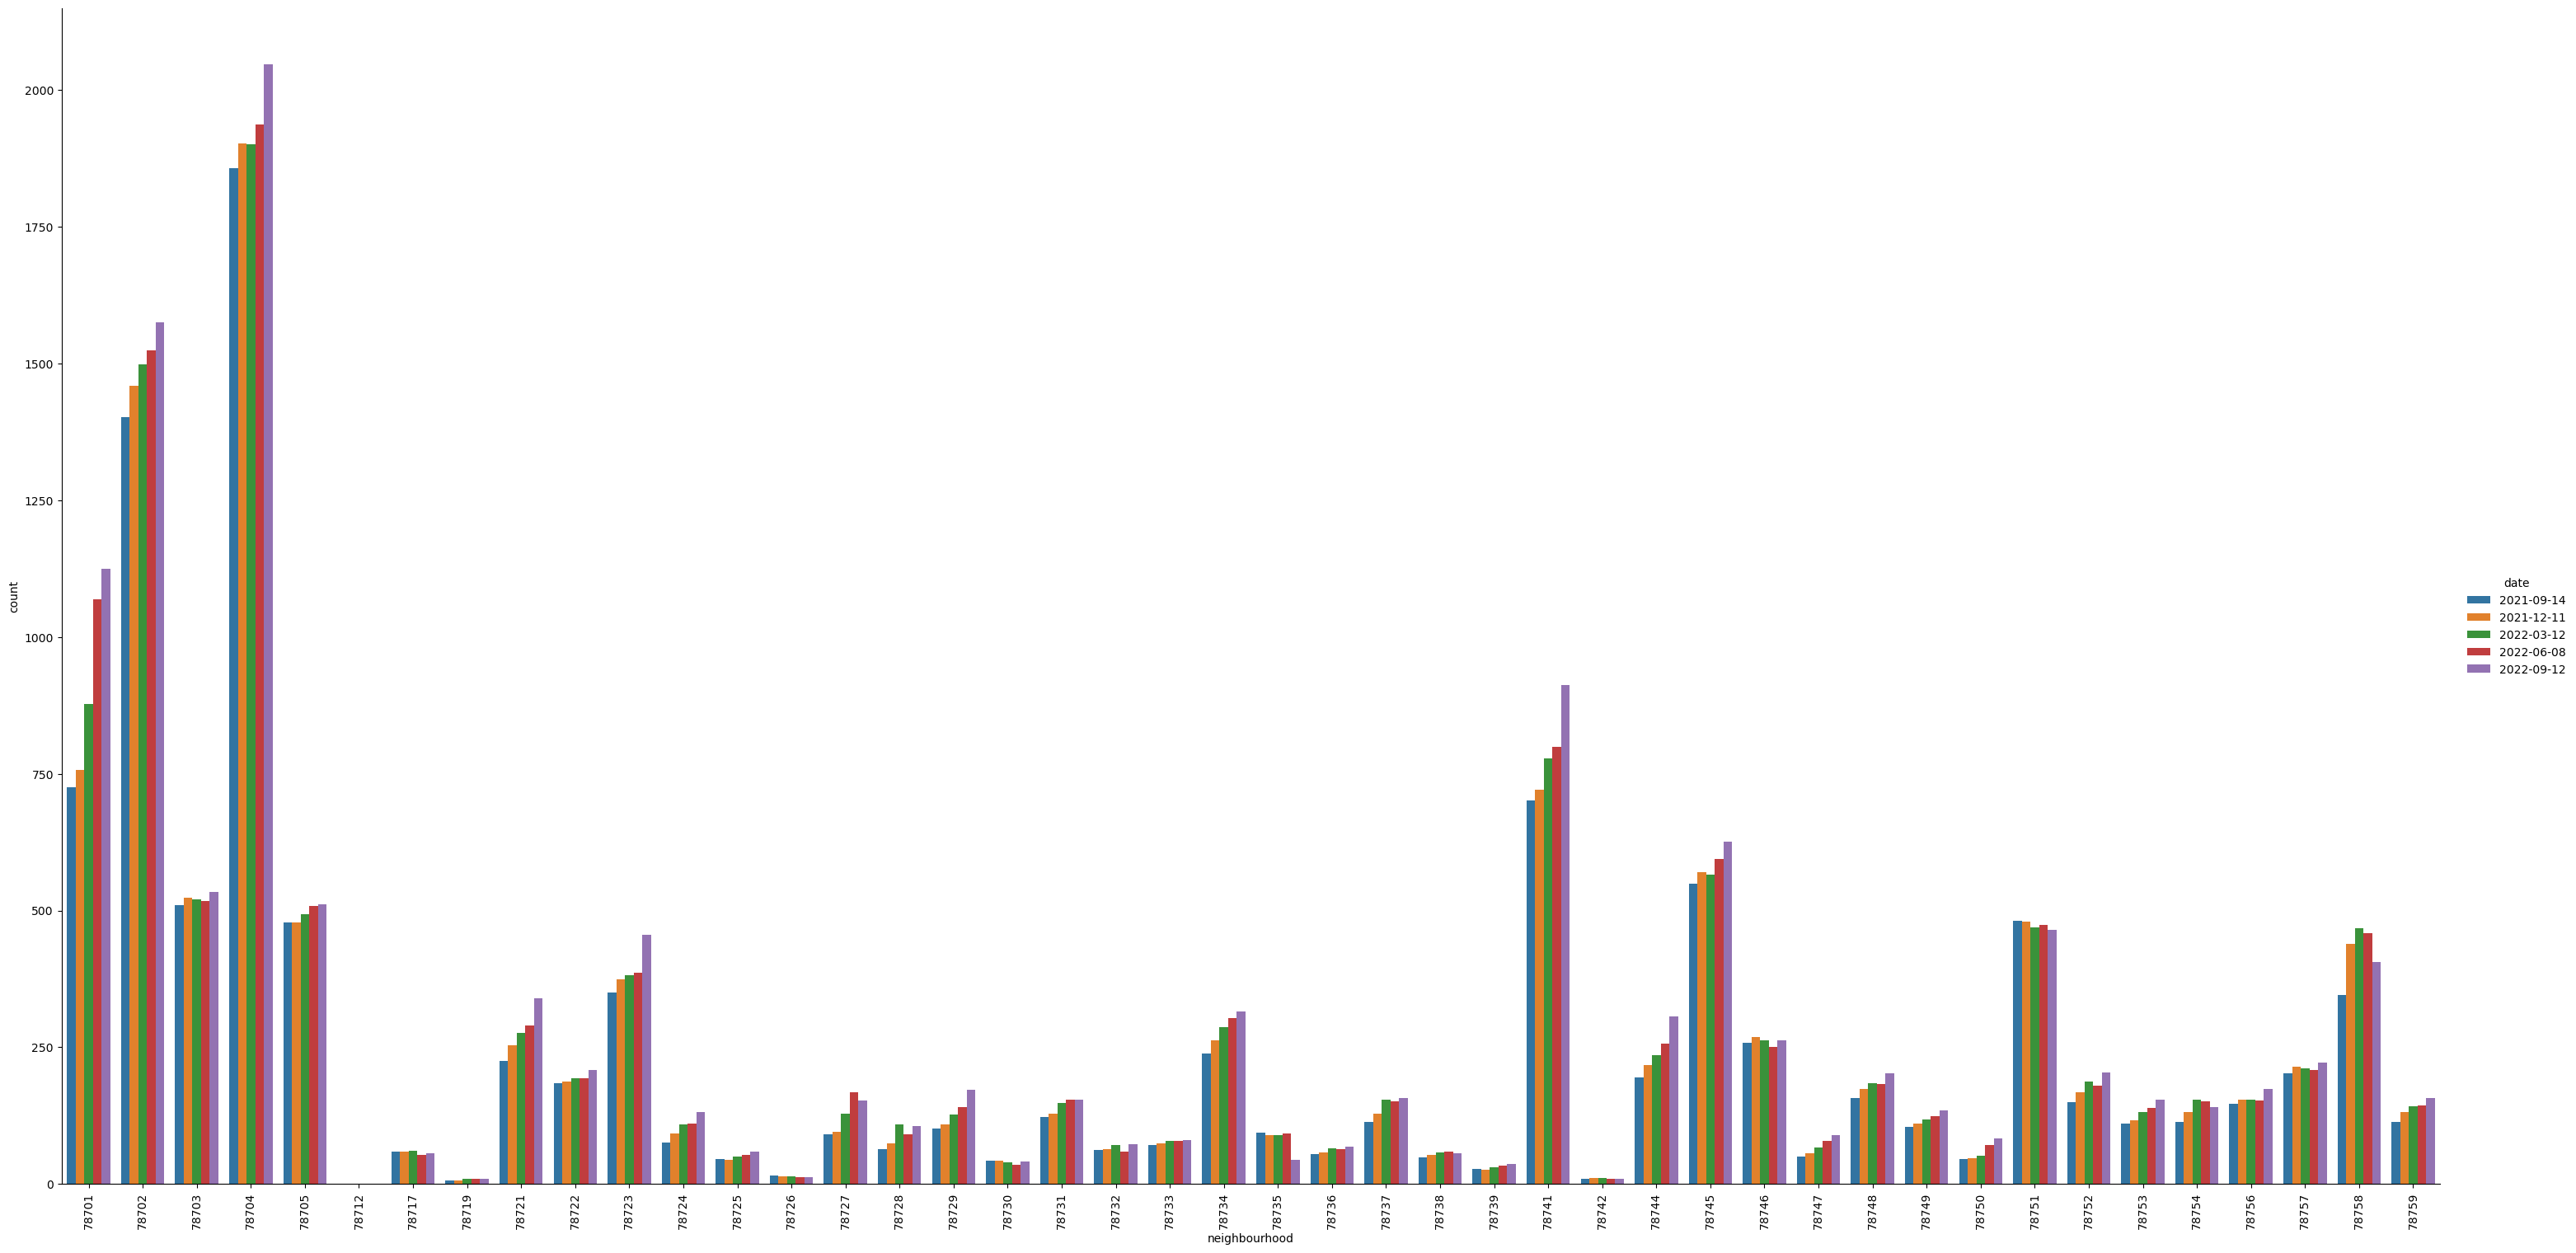

In [195]:
g = sns.catplot(x='neighbourhood', data=df, kind='count', hue='date', aspect = 2, height = 15)
g.set_xticklabels(rotation=90)

plt.show()

We can see that the most popular neighborhoods are 78704, 78702, 78701, 78741, and 78745. Each of these neighborhoods has had strong growth in rentals offered for the last 5 quarters.

In [219]:
CT = pd.crosstab(index=df.host_id, columns=[df.date], values = df.id.count(), aggfunc = 'count')
CT.sort_values('2022-09-12', ascending=False)

date,2021-09-14,2021-12-11,2022-03-12,2022-06-08,2022-09-12
host_id,,,,,
104309976,133.0,132.0,194.0,200.0,185.0
26497220,NaN,4.0,99.0,184.0,156.0
263502162,43.0,44.0,50.0,74.0,115.0
107434423,9.0,29.0,36.0,67.0,95.0
8167447,76.0,77.0,78.0,77.0,78.0
...,...,...,...,...,...
461242638,NaN,NaN,NaN,1.0,NaN
461926895,NaN,NaN,NaN,1.0,NaN
462308316,NaN,NaN,NaN,1.0,NaN


This crosstab shows the number of units offered by each host for the last 5 quarters